### Import libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.regression.rolling import RollingOLS

pd.set_option("display.precision", 2)

### Import the file and create the two data frames

In [101]:
xls = pd.ExcelFile('Data.xlsx')
df = xls.parse(0)
factors_df = xls.parse(1)

In [102]:
df['Time'] = pd.to_datetime(df['Time'])
factors_df['Time'] = pd.to_datetime(factors_df['Time'])

Limit the observations until 2018:Q3

In [103]:
df = df.iloc[0:234]

In [104]:
df.tail()

,Time,GDPC1,PCECTPI,TB3MS,GS10
229,2017-09-30,19304.35,98.95,0.43,2.13
230,2017-12-30,19398.34,99.52,0.59,2.44
231,2018-03-30,19506.95,99.72,0.89,2.26
232,2018-06-30,19660.77,100.08,1.04,2.24
233,2018-09-30,19882.35,100.68,1.21,2.37


Create $\log(GDPC1)$ and $\Delta \log(GDPC1)$

In [105]:
df['log_GDP'] = np.log(df['GDPC1'])
df['delta_log_GDP'] = (df['log_GDP'] - df['log_GDP'].shift(1))

df['delta_log_GDP'].fillna(0, inplace=True)

Create $\pi$ and $\log(PCECTPI)$

In [106]:
df['infl'] = (np.log(df['PCECTPI']) - (np.log(df['PCECTPI'])).shift(1))
df['infl'].fillna(0, inplace=True)

df['log_PCECTPI'] = np.log(df['PCECTPI'])

Create $TSpread$

In [107]:
df['tspread'] = df['GS10'] - df['TB3MS']

### **Calculate Principal Component**

Create `stand_factors` as a data frame containing 245 columns, namely all the columns of factors_df except the _Time_, but standardized ($\mu =0$, $\sigma=1$).

`factors_df` doesn't change.

In [37]:
stand_factors = factors_df.iloc[:, 1:].apply(stats.zscore, axis=0)

In [39]:
stand_factors.head()

,PCECC96,PCDGx,PCESVx,PCNDx,GPDIC1,FPIx,Y033RC1Q027SBEAx,PNFIx,PRFIx,A014RE1Q156NBEA,...,TLBSNNBx,TLBSNNBBDIx,TABSNNBx,TNWBSNNBx,TNWBSNNBBDIx,CNCFx,S&P 500,S&P: indust,S&P div yield,S&P PE ratio
0,0.345487,0.198582,1.001568,-0.275298,-1.826943,0.057890,0.639820,0.732729,-0.498651,-0.640085,...,0.977503,-0.506133,-0.828227,-0.771472,-0.749628,0.172105,0.074484,0.099485,-0.115484,-0.174575
1,-0.950126,-2.016541,0.743634,-0.003276,0.545897,-0.965475,-0.488568,-0.684404,-0.716405,0.536824,...,-2.142299,-0.851033,-1.020656,-0.485978,-1.933865,0.875186,-0.549149,-0.561475,0.440121,-0.612021
2,0.223639,0.605363,0.192954,-0.425468,2.077526,1.086674,0.710134,1.098489,0.589866,2.722511,...,1.900739,-0.445382,0.026075,-0.209566,1.850410,-1.008960,-0.706124,-0.779212,1.132685,-0.570060
3,0.645074,0.307674,0.557259,0.550779,-2.573436,-1.273241,0.132059,0.151842,-1.972480,0.200564,...,0.429553,-0.428397,-0.528344,-0.456013,-0.430267,0.102296,-0.335165,-0.399775,0.451777,-0.242132
4,-1.667558,-0.685054,-1.632966,-1.404069,-0.284477,-1.426275,-1.882351,-1.400137,-0.752689,0.536824,...,0.462580,-0.513322,-0.082459,-0.096851,-0.948319,0.470454,-0.377939,-0.490168,0.160376,0.013255


In [44]:
pca = PCA(n_components=1)
first_PC = pca.fit_transform(stand_factors)

In [46]:
print(first_PC)

[[ 3.02108812e+00]
 [ 2.92325592e+00]
 [-8.52793011e+00]
 [ 3.62260829e+00]
 [ 7.29846426e+00]
 [ 9.41167683e+00]
 [ 7.01229895e+00]
 [-2.67288308e+00]
 [-5.68001839e+00]
 [-6.76889084e+00]
 [-4.35971272e+00]
 [-2.54886889e+00]
 [-2.48368034e-01]
 [ 4.04109089e-03]
 [-1.23097625e+00]
 [-4.58855616e+00]
 [-3.16738835e+00]
 [-2.64387697e+00]
 [-4.13119795e+00]
 [-3.86464216e+00]
 [-5.15119768e+00]
 [-2.04868152e+00]
 [-8.34946852e+00]
 [-6.36369512e+00]
 [-5.31477472e+00]
 [-8.73152190e+00]
 [-7.72646980e+00]
 [-3.75191672e+00]
 [-1.18366162e+00]
 [ 1.08004193e-01]
 [ 3.72154606e+00]
 [-1.35188909e-01]
 [-3.53944237e+00]
 [-4.77471666e+00]
 [-4.21830346e+00]
 [-4.36782634e+00]
 [-3.53304997e+00]
 [-4.87094160e+00]
 [-3.82768866e+00]
 [-3.04912078e+00]
 [-2.26151327e-01]
 [ 1.75436352e+00]
 [ 7.38645341e+00]
 [ 6.24132989e+00]
 [ 4.55693429e+00]
 [ 7.95051624e+00]
 [-2.53504797e+00]
 [-2.23337635e+00]
 [-4.71501660e-01]
 [-1.19473479e+00]
 [-8.92534497e+00]
 [-4.52960844e+00]
 [-4.6417990

Da fare per ogni rolling window, 134 volte dio cane

In [108]:
df.head()

,Time,GDPC1,PCECTPI,TB3MS,GS10,log_GDP,delta_log_GDP,infl,log_PCECTPI,tspread
0,1960-06-30,3430.06,15.33,3.54,4.50,8.14,0.00e+00,0.00e+00,2.73,0.96
1,1960-09-30,3439.83,15.41,4.23,4.58,8.14,2.85e-03,5.46e-03,2.74,0.35
2,1960-12-30,3517.18,15.44,3.87,4.49,8.17,2.22e-02,1.30e-03,2.74,0.61
3,1961-03-30,3498.25,15.52,2.99,4.26,8.16,-5.40e-03,5.17e-03,2.74,1.27
4,1961-06-30,3515.39,15.57,2.36,3.83,8.16,4.89e-03,3.80e-03,2.75,1.47


## **Model 1: Random Walk**

Since the prediction for the next period is the last observed value, all we have to do is to shift(1) the series, and then consider only the prediction starting from 1985:Q2.

In [109]:
rw_predictions = df['log_GDP'].shift(1)

# bring it into real terms
exp_rw_predictions = np.exp(rw_predictions)

# consider only from 1985:Q3
exp_rw_predictions = exp_rw_predictions[100:]

# compute RMSE for RW
rmse_rw = mean_squared_error(df['GDPC1'].iloc[100:], exp_rw_predictions, squared=False).round(2)
print(rmse_rw)

119.44


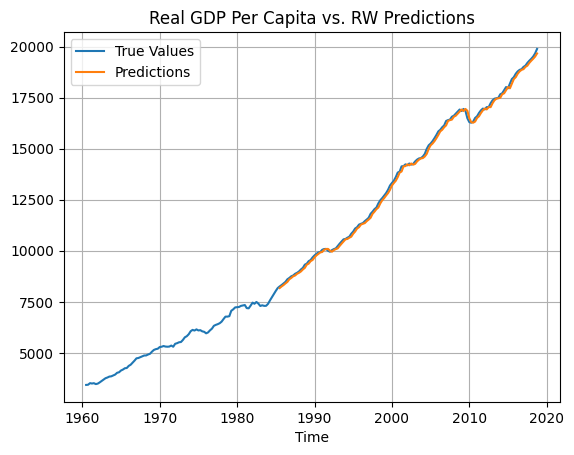

In [110]:
plt.plot(df['Time'], df['GDPC1'], label='True Values')
plt.plot(df['Time'].iloc[100:], exp_rw_predictions, label='Predictions')
plt.legend()
plt.grid()
plt.xlabel('Time')
plt.title('Real GDP Per Capita vs. RW Predictions')
plt.show()

### **Model 2: AR(4)**

https://stackoverflow.com/questions/39089693/rolling-regression-estimation-in-python-dataframe

In [130]:
lag_1 = df['delta_log_GDP'].shift(1)
lag_2 = df['delta_log_GDP'].shift(2)
lag_3 = df['delta_log_GDP'].shift(3)
lag_4 = df['delta_log_GDP'].shift(4)


ar_4_model = RollingOLS(endog=df['delta_log_GDP'],
                        exog=pd.concat([lag_1, lag_2, lag_3, lag_4], axis=1),
                        window=100)

ar_4_predictions = ar_4_model.fit()
ar_4_predictions

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''